# Algebraic

In [ ]:
%cd tree-of-problems/

In [ ]:
from top.dataset import get_dataset

number_of_numbers, number_of_digits = 16, 3
pairs = get_dataset("algebraic", f"algebraic_{number_of_numbers}_{number_of_digits}.csv")
questions = [a for (a, _) in pairs]
answers = [b for (_, b) in pairs]

In [3]:
import os
import json
import numpy as np

path = "./reasoning/llama-3-70b-instruct-awq/algebraic"
path = "./reasoning/Meta-Llama-3-8B/algebraic"

count = 0
tgt_length = 100 # 500
dico = {}
for filename in os.listdir(path):
    if filename.endswith("jsonl"):
        continue
    features = filename.split(".")[0].split("_")
    try :
        predictions = []
        local = os.path.join(path, filename)
        print(local)
        if os.path.exists(f"{local}/answer_1.jsonl"):
            L = []
            S = []
            with open(f"{local}/answer_1.jsonl", "r") as fin :
                for line in fin:
                    L.append(json.loads(line)["output"])
                    S.append(eval(json.loads(line)["sentence"]))
            L = [l[l.find("So the answer is") + len("So the answer is"): l.rfind(".")].strip() for l in L]
            L = [''.join(l.split(' ')) for l in L]
            L = [l.replace(",", "") for l in L]
            L = [int(l) for l in L]
            print(f"Leaves: {np.mean([a == b for (a, b) in zip(S, L)])}")
        with open(f"{local}/answer_0.jsonl", "r") as fin :
            for line in fin:
                predictions.append(json.loads(line)["output"])
    except Exception as e:
        print(f"ERROR except: {e}")
        continue
    if len(predictions) != tgt_length :
        print(f"ERROR, the number of predictions ({len(predictions)}) is not what we expected ({tgt_length})")
        continue

    K = []
    for prediction in predictions :
        trigger = "So the answer is"
        idx = prediction.find(trigger)
        if idx >= 0:
            prediction = prediction[idx + len(trigger) :]
            prediction = prediction[ : prediction.find(".")]
            prediction = prediction.replace(" ", "").replace(",", "")
            prediction.strip()
            if prediction == "":
                prediction = -5000
        else:
            prediction = -5000
        K.append(prediction)
    predictions = K

    targets = answers[:tgt_length]
    acc = np.mean([int(a) == b for (a, b) in zip(predictions, targets)])
    print(f"{count}: {filename}\nAccuracy = {acc}")
    count += 1

./reasoning/Meta-Llama-3-8B/algebraic/algebraic_cot_8_shot_seed_122_2_1
Leaves: 0.956
ERROR, the number of predictions (500) is not what we expected (100)
./reasoning/Meta-Llama-3-8B/algebraic/algebraic_cot_8_shot_seed_122_0_0
ERROR, the number of predictions (500) is not what we expected (100)
./reasoning/Meta-Llama-3-8B/algebraic/algebraic_cot_8_shot_seed_122_2_2
Leaves: 0.98
0: algebraic_cot_8_shot_seed_122_2_2
Accuracy = 0.86
./reasoning/Meta-Llama-3-8B/algebraic/algebraic_cot_8_shot_seed_122_1_15
Leaves: 0.82
1: algebraic_cot_8_shot_seed_122_1_15
Accuracy = 0.81


# Coin

In [ ]:
%cd tree-of-problems/

In [4]:
from top.dataset import get_dataset
q = 16
pairs = get_dataset("coin", f"coin_{q}.csv")
questions = [a for (a, _) in pairs]
answers = [b for (_, b) in pairs]

In [5]:
# ONLY WORKS FOR "1_{x}_" and 2_{x}
import os
import json
import numpy as np

path = f"./reasoning/paper/{q}/Meta-Llama-3-8B/coin"
path = f"./reasoning/paper/{q}/gpt-3.5-turbo-instruct/coin"

count = 0
tgt_length = 500
dico = {}
for filename in os.listdir(path):
    if filename.endswith("jsonl"):
        continue
    #if "_2_0" not in filename:
    #    continue
    #if "1_2_0" not in filename:
    #    continue
    features = filename.split(".")[0].split("_")
    try :
        predictions = []
        local = os.path.join(path, filename)
        print(local)
        if os.path.exists(f"{local}/answer_1.jsonl"):
            L = []
            S = []
            with open(f"{local}/answer_1.jsonl", "r") as fin :
                for line in fin:
                    L.append(json.loads(line)["output"])
                    S.append(json.loads(line)["sentence"].count("flips"))
            S = ["yes" if s%2 == 0 else "no" for s in S]
            trigger = "So the answer is"
            L = [l[l.find(trigger) + len(trigger): l.rfind(".")].strip() if trigger in l else l for l in L]
            print(f"Ack: {np.mean([a.lower() == b.lower() for (a, b) in zip(S, L)])}")
        with open(f"{local}/answer_0.jsonl", "r") as fin :
            for line in fin:
                predictions.append(json.loads(line)["output"])
    except Exception as e:
        print(f"ERROR except: {e}")
        continue
    if len(predictions) != tgt_length :
        print(f"ERROR, the number of predictions ({len(predictions)}) is not what we expected ({tgt_length})")
        continue
    if "122_1_" in filename:
        K = []
        for i, prediction in enumerate(predictions):
            #"""
            if "started heads up" in prediction:
                K.append("yes"*("yes." in prediction) + "no"*("no." in prediction))
            elif "started tails up" in prediction:
                K.append("no"*("yes." in prediction) + "yes"*("no." in prediction))
            else:
                raise ValueError("BIG PROBLEM")
            #"""
        # print(predictions[0])
        predictions = K
    else:
        K = []
        for prediction in predictions :
            trigger = "So the answer is"
            idx = prediction.find(trigger)
            if idx >= 0:
                prediction = prediction[idx + len(trigger) :]
                prediction = prediction[ : prediction.find(".")]
            K.append(prediction.strip())
        predictions = K
    targets = answers[:tgt_length]
    acc = np.mean([a.split(".")[0].split(",")[0].lower() == b.lower() for (a, b) in zip(predictions, targets)])
    print(f"{count}: {filename}\nAccuracy = {acc}")
    count += 1

./reasoning/paper/16/gpt-3.5-turbo-instruct/coin/coin_cot_8_shot_seed_122_2_1_0
Ack: 0.854
0: coin_cot_8_shot_seed_122_2_1_0
Accuracy = 0.604
./reasoning/paper/16/gpt-3.5-turbo-instruct/coin/coin_cot_8_shot_seed_122_0_0_0
1: coin_cot_8_shot_seed_122_0_0_0
Accuracy = 0.718
./reasoning/paper/16/gpt-3.5-turbo-instruct/coin/coin_cot_8_shot_seed_122_1_2_0
Ack: 0.868
2: coin_cot_8_shot_seed_122_1_2_0
Accuracy = 0.756
./reasoning/paper/16/gpt-3.5-turbo-instruct/coin/coin_standard_8_shot_seed_122_0_0_0
3: coin_standard_8_shot_seed_122_0_0_0
Accuracy = 0.476


# Concatenation

In [ ]:
%cd tree-of-problems/

In [10]:
from top.dataset import get_dataset

q = 16
pairs = get_dataset("concatenation", f"concatenation_{q}.csv")
questions = [a for (a, _) in pairs]
answers = [b for (_, b) in pairs]

In [11]:
all_solutions = [
    [
        ''.join(
            [
                element[-1] for element in 
                questions[i].split(", ")[:j]
            ]
        )
        for j in range(2, q+1)
    ]
    for i in range(len(questions))
]

In [12]:
path = f"./reasoning/paper/{q}/gpt-3.5-turbo-instruct/concatenation"
# L2M
for filename in os.listdir(path):
    if f"1_{q-1}" not in filename:
        continue
    for j in range(q-2, -1, -1):
        predictions = []
        with open(os.path.join(os.path.join(path, filename), f"answer_{j}.jsonl"), "r") as fin:
            for line in fin:
                predictions.append(json.loads(line)["output"])
        predictions = [
            prediction[prediction.rfind("outputs \"") + len("outputs \"") : prediction.rfind("\".")]
            for prediction in predictions
        ]
        T = [l[q-2-j] for l in all_solutions]
        print(f"acc: {np.mean([a == b for (a, b) in zip(predictions, T)])}")

acc: 1.0
acc: 1.0
acc: 0.98
acc: 0.954
acc: 0.936
acc: 0.914
acc: 0.902
acc: 0.876
acc: 0.86
acc: 0.828
acc: 0.81
acc: 0.8
acc: 0.78
acc: 0.754
acc: 0.742


In [13]:
path = f"./reasoning/paper/{q}/gpt-3.5-turbo-instruct/concatenation"
r = int(np.log2(q)) - 1 # ToP

for filename in os.listdir(path):
    if f"_2_{r}" not in filename:
        continue
    print(filename)
    for j in range(r, -1, -1):
        predictions = []
        T = []
        with open(os.path.join(os.path.join(path, filename), f"answer_{j}.jsonl"), "r") as fin:
            for line in fin:
                predictions.append(json.loads(line)["output"])
                T.append(json.loads(line)["sentence"])
        T = ["".join([elt[-1] for elt in element.split(",")]) for element in T]
        predictions = [
            prediction[prediction.rfind("outputs \"") + len("outputs \"") : prediction.rfind("\".")]
            for prediction in predictions
        ]
        print(f"acc: {np.mean([a == b for (a, b) in zip(predictions, T)])}")

concatenation_cot_8_shot_seed_122_2_3_0
acc: 1.0
acc: 0.988
acc: 0.945
acc: 0.844


<Figure size 400x300 with 0 Axes>

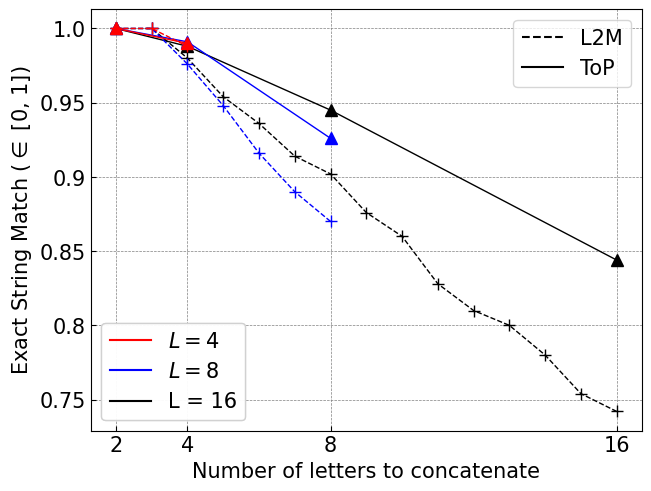

In [14]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

plt.figure(figsize=(4, 3))
K = [2, 4, 8, 16]
markersize = 8
fig, ax = plt.subplots(layout='constrained')
ax.set_xticks(
    ticks = K,
    labels = K,
    fontsize = 15
)
ax.set_yticks(
    ticks = [0.75, 0.80, 0.85, 0.90, 0.95, 1.0],
    labels = [0.75, 0.80, 0.85, 0.90, 0.95, 1.0],
    fontsize = 15
)
ax.tick_params(direction="in")

p1,  = ax.plot(
    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    [1.0, 1.0, 0.98, 0.954, 0.936, 0.914, 0.902, 0.876, 0.86, 0.828, 0.81, 0.8, 0.78, 0.754, 0.742],
    linestyle="dashed",
    linewidth=1.0,
    marker="+",
    markersize=markersize,
    #label="L2M",
    color="black"
)
p2, = ax.plot(
    [2, 4, 8, 16],
    [1.0, 0.988, 0.945, 0.844],
    linestyle="solid",
    linewidth=1.0,
    marker="^",
    markersize=markersize,
    #label="ToP",
    label="L = 16",
    color="black"
)

p3,  = ax.plot(
    [2, 3, 4, 5, 6, 7, 8],
    [1.0, 1.0, 0.976, 0.948, 0.916, 0.89, 0.87],
    linestyle="dashed",
    linewidth=1.0,
    marker="+",
    markersize=markersize,
    #label="L2M",
    color="blue"
)
p4, = ax.plot(
    [2, 4, 8],
    [1.0, 0.991, 0.926],
    linestyle="solid",
    linewidth=1.0,
    marker="^",
    markersize=markersize,
    #label="ToP",
    label="L = 8",
    color="blue"
)

p5, = ax.plot(
    [2, 3, 4],
    [1.0, 1.0, 0.988],
    linestyle="dashed",
    linewidth=1.0,
    marker="+",
    markersize=markersize,
    #label="L2M",
    color="red"
)
p6, = ax.plot(
    [2, 4],
    [1.0, 0.99],
    linestyle="solid",
    linewidth=1.0,
    marker="^",
    markersize=markersize,
    #label="ToP",
    label="L = 4",
    color="red"
)

plt.xlabel("Number of letters to concatenate", fontsize=15)
plt.ylabel(f"Exact String Match ($\in$ [0, 1])", fontsize=15)
plt.grid(color="grey", linestyle="--", linewidth=0.5)

# Create custom legend handles and labels for line types
custom_lines = [Line2D([0], [0], color='k', linestyle='--'),
                Line2D([0], [0], color='k', linestyle='-')]
custom_labels = [r"L2M", r"ToP"]

# Add the custom legend for line types
first_legend = ax.legend(custom_lines, custom_labels, loc='upper right', fontsize=15)

# Create custom legend handles and labels for colors
color_lines = [Line2D([0], [0], color='red', linestyle='-'),
               Line2D([0], [0], color='blue', linestyle='-'),
               Line2D([0], [0], color='black', linestyle='-')]
color_labels = [r"$L = 4$", r"$L = 8$", r"L = 16"]

# Add the custom legend for colors
second_legend = ax.legend(color_lines, color_labels, loc='lower left', fontsize=15)

# Add the first legend back to the plot
ax.add_artist(first_legend)
ax.add_artist(second_legend)

#plt.savefig("top2.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [12]:
from top.dataset import get_dataset

q = 16
pairs = get_dataset("concatenation", f"concatenation_{q}.csv")
questions = [a for (a, _) in pairs]
answers = [b for (_, b) in pairs]

In [15]:
import os
import json
import numpy as np

path = f"./reasoning/paper/{q}/gpt-3.5-turbo-instruct/concatenation"

count = 0
tgt_length = 500
dico = {}
for filename in os.listdir(path):
    if filename.endswith("jsonl"):
        continue
    #if "2_1_0" not in filename:
    #    continue
    #if "2_2_0" not in filename:
    #    continue
    #if f"1_{q-1}" not in filename:
    #    continue
    features = filename.split(".")[0].split("_")
    try :
        local = os.path.join(path, filename)
        if os.path.exists(f"{local}/answer_1.jsonl"):
            S = []
            L = []
            with open(f"{local}/answer_1.jsonl", "r") as fin :
                for line in fin:
                    L.append(json.loads(line)["output"])
                    S.append(json.loads(line)["sentence"])
            trigger = " outputs \""
            preds = [l[l.rfind(trigger) + len(trigger) : l.rfind("\".")] if trigger in l else l for l in L]
            outputs = ["".join([e[-1] for e in s.split(",")]) for s in S]
            #preds = ["".join([elt[-1] for elt in sentence.split(",")]) for sentence in sentences]
            print(f"ack: {np.mean([a.lower() == b.lower() for (a, b) in zip(preds, outputs)])}")
        # Get the predictions
        predictions = []
        local = os.path.join(path, filename)
        print(local)
        with open(f"{local}/answer_0.jsonl", "r") as fin :
            for line in fin:
                predictions.append(json.loads(line)["output"])    
    except Exception as e:
        print(f"ERROR except: {e}")
        continue
    if len(predictions) != tgt_length :
        print(f"ERROR, the number of predictions ({len(predictions)}) is not what we expected ({tgt_length})")
        continue
    K = []
    for prediction in predictions :
        indices = [i for i, a in enumerate(prediction) if a == "\""]
        #print(prediction[indices[-2]+1 : indices[-1]])
        if len(indices) >= 2:
            prediction = prediction[indices[-2]+1 : indices[-1]]
        if prediction.startswith("The concatenation of the last") and "outputs" not in prediction:
            trigger = "is \""
        elif prediction.startswith("Based on the") and "outputs" not in prediction:
            trigger = "would be \""
        else:
            trigger = " outputs \""
        idx = prediction.rfind(trigger)
        if idx >= 0 :
            prediction = prediction[idx + len(trigger):]
            prediction = prediction[:prediction.find("\"")]
        trigger = "= "
        idx = prediction.rfind(trigger)
        if idx >= 0:
            obj = prediction[idx + len(trigger):].strip()
        else:
            obj = prediction.strip()
        if obj.startswith("\""):
            obj = obj[1:]
        if obj.endswith("\""):
            obj = obj[:-1]
        obj = obj.replace(", ", "").replace(" ", "").replace(",", "")
        K.append(obj)

    predictions = K            
    targets = answers[:tgt_length]
    acc = np.mean([a.lower() == b.lower() for (a, b) in zip(predictions, targets)])
    print(f"{count}: {filename}\nAccuracy = {acc}")
    count += 1

./reasoning/paper/16/gpt-3.5-turbo-instruct/concatenation/concatenation_cot_8_shot_seed_122_0_0_0
0: concatenation_cot_8_shot_seed_122_0_0_0
Accuracy = 0.252
ack: 0.754
./reasoning/paper/16/gpt-3.5-turbo-instruct/concatenation/concatenation_cot_8_shot_seed_122_1_15_0
1: concatenation_cot_8_shot_seed_122_1_15_0
Accuracy = 0.742
./reasoning/paper/16/gpt-3.5-turbo-instruct/concatenation/concatenation_cot_8_shot_seed_122_0_0_0_SC_16
2: concatenation_cot_8_shot_seed_122_0_0_0_SC_16
Accuracy = 0.116
./reasoning/paper/16/gpt-3.5-turbo-instruct/concatenation/concatenation_standard_8_shot_seed_122_0_0_0
3: concatenation_standard_8_shot_seed_122_0_0_0
Accuracy = 0.0
ack: 0.669
./reasoning/paper/16/gpt-3.5-turbo-instruct/concatenation/concatenation_cot_8_shot_seed_122_2_1_0
4: concatenation_cot_8_shot_seed_122_2_1_0
Accuracy = 0.444
ack: 0.945
./reasoning/paper/16/gpt-3.5-turbo-instruct/concatenation/concatenation_cot_8_shot_seed_122_2_3_0
5: concatenation_cot_8_shot_seed_122_2_3_0
Accuracy = 0.8

# BBH

In [ ]:
%cd tree-of-problems/

In [16]:
from top.bbh.utils import BBH_TASKS
from top.dataset import get_dataset

bbh = {}
for problem_name in BBH_TASKS:
    targets = [b for (_, b) in get_dataset(problem_name, "got")]
    bbh[problem_name] = targets

from sentence_splitter import SentenceSplitter
splitter = SentenceSplitter(language="en")

## Eval

In [32]:
#problem_name = "boolean_expressions"
#problem_name = "multistep_arithmetic_two"
#problem_name = "navigate"
#problem_name = "object_counting"
#problem_name = "temporal_sequences"
problem_name = "tracking_shuffled_objects_seven_objects" #(3, 2, 2)
#problem_name = "tracking_shuffled_objects_five_objects" #(3, 2) / (2, 2, 1)
#problem_name = "tracking_shuffled_objects_three_objects" #(2, 1)
#problem_name = "hyperbaton"
#problem_name = "logical_deduction_three_objects"
#problem_name = "logical_deduction_five_objects"
#problem_name = "logical_deduction_seven_objects"
#problem_name = "web_of_lies"
#problem_name = "word_sorting"
#problem_name = "sports_understanding"
#problem_name = "dyck_languages"
#problem_name = "sorting"
targets = bbh[problem_name]

In [33]:
import os
import json
import numpy as np

#path = f"./reasoning/paper/Meta-Llama-3-8B/{problem_name}"
path = f"./reasoning/paper/gpt-3.5-turbo-instruct/{problem_name}"
#path = f"./reasoning/paper/Llama-2-70B-AWQ/{problem_name}"
#path = f"./reasoning/paper/Llama-2-13b-hf/{problem_name}"
#path = f"./reasoning/paper/Llama-2-7b-hf/{problem_name}"

def dyck(s):
    stack = []
    for element in s :
        if element in ["(", "<", "[", "{"]:
            stack.append(element)
        else:
            try :
                stack.pop()
            except Exception as e:
                print(f"Le voici: {s}")
                raise e
    dico = {"(":")", "{":"}", "[":"]", "<":">"} 
    return " ".join([dico[e] for e in stack[::-1]])

def is_sorted(a):
    if len(a) == 1:
        return True
    return all([a[i] <= a[i+1] for i in range(len(a) - 1)])

count = 0
tgt_length = {"hyperbaton": 500, "dyck_languages": 176, "word_sorting": 184, "sorting": 100}.get(problem_name, 250)

dico = {}
for filename in os.listdir(path):
    if filename.endswith("jsonl"):
        continue
    #if "2_1_0" not in filename and "2_2_0" not in filename:
    #    continue
    #if "2_1_0" not in filename or "cot" not in filename:
    #    continue
    #if "cot" in filename:
    #    continue
    features = filename.split(".")[0].split("_")
    try :
        local = os.path.join(path, filename)
        intermediate = "answer_1"
        if os.path.exists(f"{local}/{intermediate}.jsonl"):
            S = []
            L = []
            with open(f"{local}/{intermediate}.jsonl", "r") as fin :
                for line in fin:
                    L.append(json.loads(line)["output"])
                    S.append(json.loads(line)["sentence"])
            trigger = "So the answer is \""
            preds = [l[l.rfind(trigger) + len(trigger) : l.rfind("\".")] for l in L]
            outputs = ["".join([e[-1] for e in s.split(",")]) for s in S]
            if "object_counting" in problem_name:
                trigger = "So the answer is "
                preds = [l[l.rfind(trigger) + len(trigger) : l.rfind(".")].strip() if trigger in l else l for l in L]
                #preds_ = [400 if len(l) >= 3 else l for l in preds]
                #preds2 = [int(preds_[i]) + int(preds_[i+1]) for i in range(0, len(preds), 2)]
                #oracle = np.mean([a == int(b) for (a, b) in zip(preds2, targets)])
                #print(f"Oracle: {oracle}.")
            if problem_name == "dyck_languages":
                trigger = "So the answer is "
                preds = [l[l.rfind(trigger) + len(trigger) : l.rfind(".")] if trigger in l else l for l in L]
                inputs = [s[s.find("Input: ") + len("Input: "):] for s in S]
                outputs = [s.replace("<subproblem>", "").replace("</subproblem>", "").split(" ") for s in inputs]
                outputs = [dyck(s) for s in outputs]
                for idx, (alpha, beta, gamma) in enumerate(zip(inputs, preds, outputs)):
                    if idx >= 10:
                        break
                    # print(f"In: {alpha}\nPred: {beta}\nGT: {gamma}\n")
            if problem_name == "multistep_arithmetic_two":
                outputs = [eval(s.replace("=", "").strip()) for s in S]
                outputs = [str(s) for s in outputs]
                if "standard" in filename:
                    preds = L
                else:
                    preds = [l[l.find("So the answer is ") + len("So the answer is ") : l.rfind(".")] for l in L]   
            if problem_name == "boolean_expressions":
                preds = [eval(s.replace("is", "").strip()) for s in S]
                preds = [str(s) for s in preds]
                if "standard" in filename:
                    outputs = L
                else:
                    outputs = [l[l.find("So the answer is ") + len("So the answer is ") : l.rfind(".")] for l in L]    
            elif problem_name == "web_of_lies":
                preds = []
                for s in S:
                    sents = splitter.split(s)
                    status = None
                    for q, sent in enumerate(sents):
                        if q == 0 or q == len(sents) - 1:
                            continue
                        elif q == 1:
                            status = True if "truth" in sent else False
                        else:
                            status = (status is True) if "truth" in sent else (status is False)
                    preds.append("Yes" if status else "No")
                preds = [str(s) for s in preds]
                if "standard" in filename:
                    outputs = L
                else:
                    outputs = [l[l.find("So the answer is ") + len("So the answer is ") : l.rfind(".")] for l in L] 
            elif problem_name == "word_sorting":
                preds = [" ".join(sorted(s[s.rfind(":") + 1: ].strip().split(" "))) for s in S]
                if "standard" in filename:
                    outputs = L
                else:
                    outputs = [l[l.find("the answer is ") + len("the answer is ") : l.rfind(".")] for l in L]
                wow = [is_sorted(elt.split(' ')) for elt in outputs]
                print(f"Oracle: {np.mean([wow[r] and wow[r+1] for r in range(0, len(wow), 2)])}")
            elif "tracking" in problem_name:
                outputs = []
                for s in S:
                    sentences = splitter.split(s)
                    # names
                    names = sentences[0].split(", ")
                    last = names.pop()
                    last = last.strip()[len("and"):].strip().split()[0]
                    names.append(last)
                    # matching
                    # sentences[1]
                    matching = {}
                    for name in names:
                        idx1 = sentences[1].find(name)
                        #print(f"idx1: {idx1}")
                        idx2 = sentences[1][idx1:].find(",")
                        if idx2 == -1:
                            idx2 = idx2 = sentences[1][idx1:].find(".")
                        idx2 += idx1
                        #print(f"idx2: {idx2}")
                        sentence = sentences[1][idx1 : idx2]
                        for trigger in [" is dancing with ", " is playing ", " has a ", " gets "]:
                            if trigger in sentence:
                                a, b = sentence.split(trigger)
                                matching[a.strip()] = b.strip()
                                break
                    # split
                    # sentences[3:-1]
                    for sentence in sentences[3:-1]:
                        liste = sentence.split()
                        idx = liste.index("and")
                        a = liste[idx-1]
                        b = liste[idx+1]
                        matching[a], matching[b] = matching[b], matching[a]
                    outputs.append(", ".join([f"{k}: {v}" for k, v in matching.items()]))
                trigger = "So the answer is "
                preds = [l[l.rfind(trigger) + len(trigger) : l.rfind("\".")] for l in L]
            print(f"ack: {np.mean([a.lower() == b.lower() for (a, b) in zip(preds, outputs)])}")
        # Get the predictions
        predictions = []
        local = os.path.join(path, filename)
        delta = []
        print(local)
        with open(f"{local}/answer_0.jsonl", "r") as fin :
            for line in fin:
                predictions.append(json.loads(line)["output"]) 
                delta.append(json.loads(line)["sentence"])   
    except Exception as e:
        print(f"ERROR except: {e}")
        continue
    if len(predictions) != tgt_length :
        print(f"ERROR, the number of predictions ({len(predictions)}) is not what we expected ({tgt_length})")
        continue
    K = []
    for prediction in predictions :
        prediction = prediction.split("\n\n")[0]
        trigger = "So the answer is"
        idx = prediction.rfind(trigger)
        #prediction=prediction.replace(".", "")
        if idx >= 0 :
            prediction = prediction[idx + len(trigger):]
            prediction = prediction[:prediction.rfind("\".")]
        obj = prediction
        if obj.startswith("\""):
            obj = obj[1:]
        if obj.endswith("\""):
            obj = obj[:-1]
        K.append(obj.strip())
    predictions = K
    if problem_name == "sorting":
        predictions = [
            prediction.replace("\"", "").replace("'", "") for prediction in predictions
        ]
    targets = targets
    acc = np.mean([a.lower() == b.lower() for (a, b) in zip(predictions, targets)])
    print(f"{count}: {filename}\nAccuracy = {acc}")
    count += 1

ack: 0.4
./reasoning/paper/gpt-3.5-turbo-instruct/tracking_shuffled_objects_seven_objects/tracking_shuffled_objects_seven_objects_cot_3_shot_seed_122_1_2_0
0: tracking_shuffled_objects_seven_objects_cot_3_shot_seed_122_1_2_0
Accuracy = 0.188
./reasoning/paper/gpt-3.5-turbo-instruct/tracking_shuffled_objects_seven_objects/tracking_shuffled_objects_seven_objects_cot_3_shot_seed_122_0_0_0
1: tracking_shuffled_objects_seven_objects_cot_3_shot_seed_122_0_0_0
Accuracy = 0.044
./reasoning/paper/gpt-3.5-turbo-instruct/tracking_shuffled_objects_seven_objects/tracking_shuffled_objects_seven_objects_standard_3_shot_seed_122_0_0_0
2: tracking_shuffled_objects_seven_objects_standard_3_shot_seed_122_0_0_0
Accuracy = 0.0


## Viz

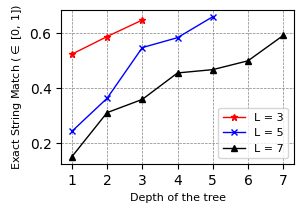

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(
    #figsize=(4, 3)
    figsize=(3, 2)
)
K = [1, 2, 3, 4, 5, 6, 7]
#K = [0, 1, 2, 3, 4, 5, 6]

plt.xticks(
    ticks = K
)

three = [0.524, 0.588, 0.648]
five = [0.244, 0.364, 0.548, 0.584, 0.66]
seven = [0.152, 0.312, 0.36, 0.456, 0.468, 0.5, 0.592]

plt.plot(
    K[:len(three)],
    three,
    linestyle="solid",
    linewidth=1.0,
    marker="*",
    markersize=5,
    label="L = 3",
    color = "red"
)
plt.plot(
    K[:len(five)],
    five,
    linestyle="solid",
    linewidth=1.0,
    marker="x",
    markersize=5,
    label="L = 5",
    color="blue"
)
plt.plot(
    K[:len(seven)],
    seven,
    linestyle="solid",
    linewidth=1.0,
    marker="^",
    markersize=5,
    label="L = 7",
    color="black"
)
plt.xlabel("Depth of the tree", fontsize=8)
plt.ylabel(f"Exact String Match ($\in$ [0, 1])", fontsize=8)
plt.grid(color="grey", linestyle="--", linewidth=0.5)
#plt.title("Per depth accuracy of ToP on $\it{Tracking~Shuffled~Objects}$.", fontsize=10)
plt.legend(fontsize=8)
# plt.savefig("top.pdf", format="pdf", bbox_inches="tight")
plt.show()

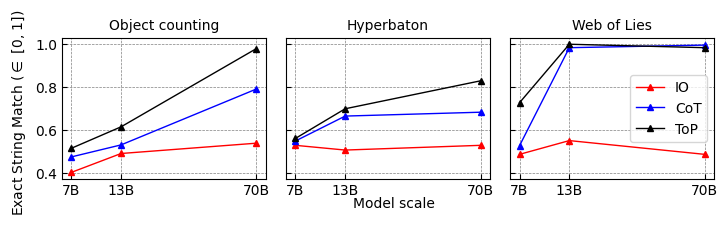

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

rows = 1
colors = ["red", "blue", "black"]
methods = ["IO", "CoT", "ToP"]
P = [
        [
            [0.404, 0.492, 0.54],
            [0.476, 0.532, 0.792],
            [0.516, 0.616, 0.98]
        ],
        [
            [0.53, 0.508, 0.53],
            [0.55, 0.666, 0.684],
            [0.562, 0.7, 0.83]
        ],
        [
            [0.488, 0.552, 0.488],
            [0.528, 0.984, 0.996],
            [0.728, 1.0, 0.984]
        ],
        [
            [0.156, 0.076, 0.056],
            [0.156, 0.184, 0.584],
            [0.136, 0.132, 0.568]
        ],
        [
            [0.0, 0.012, 0.008],
            [0.0, 0.044, 0.528],
            [0.0, 0.048, 0.664]
        ],
        [
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 0.288],
            [0.0, 0.004, 0.592]
        ],        
        [
            [0.4672, 0.728, 0.812],
            [0.628, 0.768, 0.868],
            [0.672, 0.728, 0.924]
        ],
        [
            [0.008, 0.012, 0.0016],
            [0.004, 0.024, 0.196],
            [0.012, 0.044, 0.216]
        ],

]
G = [
        [
            [0.288, 0.484],
            [0.544, 0.704],
            [0.44, 0.86]
        ],
        [
            [0.478, 0.5],
            [0.696, 0.64],
            [0.63, 0.786]   
        ],
        [
            [0.488, 0.5],
            [0.512, 1.0],
            [0.536, 1.0]
        ],
        [
            [0.144, 0.128],
            [0.148, 0.42],
            [0.072, 0.556]
        ],
        [
            [0.008, 0.008],
            [0.012, 0.188],
            [0.012, 0.344]
        ],
        [
            [0.712, 0.832],
            [0.744, 0.844],
            [0.716, 0.912]
        ],
        [
            [0.012, 0.0],
            [0.184, 0.68],
            [0.068, 0.24]
        ]
]

names = [
    "Object counting",
    "Hyperbaton",
    "Web of Lies",
    "Tracking Shuffled Objects (3)",
    "Tracking Shuffled Objects (5)",
    "Tracking Shuffled Objects (7)",
    "Boolean Expressions",
    "Multistep Arithmetic Two"
]
# cols = len(P)
cols = 3
f, ax = plt.subplots(
    rows,
    cols,
    #sharex=True,
    #sharey='row',
    sharey=True,
    #figsize=(10, 4)
    figsize=(8, 2)
)
if rows == 1:
    ax = [ax]
#"""
plt.subplots_adjust(
    left=0.085,
    bottom=0.170, # compatible with (8, 2); otherwise 0.125 for (10, 4)
    #right=0.9, 
    top=0.875, 
    wspace=0.1, 
    #hspace=0.4
)
#"""
f.supxlabel("Model scale", fontsize=10)
f.supylabel(f"Exact String Match ($\in$ [0, 1])", fontsize=10)
K = [7, 13, 70]
# K = [2, 7]
for i in range(rows):
    for j in range(cols) :
        for m, element in enumerate(P[j]):
            if m >= cols:
                break
            ax[0][j].plot(
                K,
                P[j][m] if 70 in K else G[j][m],
                label=f"{methods[m]}",
                linestyle="solid", 
                linewidth=1.0, 
                marker="^", 
                markersize=4,
                color=colors[m],
            )
        ax[0][j].grid(color="grey", linestyle="--", linewidth=0.5)
        ax[0][j].set_title(f"{names[j]}", fontsize=10)
        ax[0][j].set_xscale('log')
        ax[0][j].set_xticks(ticks = K)
        ax[0][j].set_xticklabels(
            [f"{k}B" for k in K],
            fontsize = 10
        )
        ax[0][j].tick_params(axis='y', direction='in')
        ax[0][j].tick_params(axis='x', direction='in')
        ax[0][j].yaxis.set_major_formatter(ScalarFormatter())
        ax[0][j].minorticks_off()
#f.suptitle("Analysis of the scaling behaviour of ToP on BBH tasks with the LLaMA 2 family.", fontsize=10, y=1.0)
plt.legend() 
# plt.savefig("scale.pdf", format="pdf", bbox_inches="tight")
plt.show()

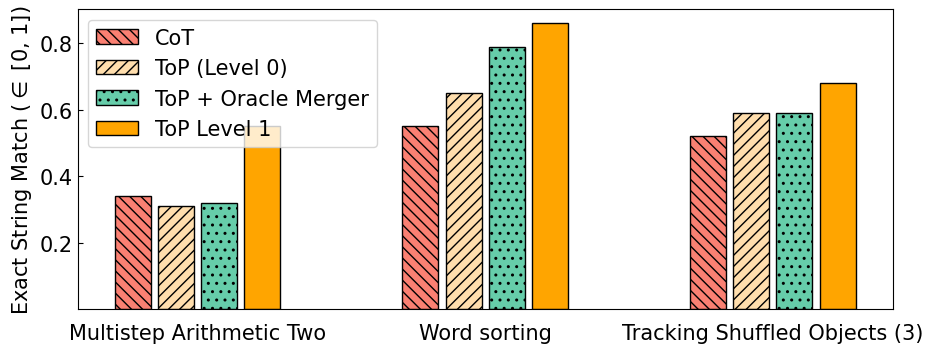

In [27]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Multistep Arithmetic Two", "Word sorting", "Tracking Shuffled Objects (3)")

penguin_means = {
    'CoT': (0.34, 0.554, 0.524),
    'ToP (Level 0)': (0.308, 0.647, 0.588),
    'ToP + Oracle Merger': (0.316, 0.793, 0.588),
    'ToP Level 1': (0.55, 0.864, 0.68),
}

r = 0.3
r = 0.4
x = r*np.arange(len(species))  # the label locations
width = 0.05  # the width of the bars
space = 0.01
multiplier = 0.0
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
hatches = ["\\\\\\", "///", "..", ""]
colors = ["salmon", "navajowhite", "mediumaquamarine", "orange"]
fig, ax = plt.subplots(
    #layout='constrained', 
    figsize=(10, 4)
    #figsize = (6, 2)
)

fontsize = 8
fontsize = 15

plt.subplots_adjust(
    left=0.085,
    bottom=0.125, 
    #right=0.9, 
    top=0.875, 
    wspace=0.1, 
    #hspace=0.4
)
freq = 1.0
for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = (width + space) * multiplier
    rects = ax.bar(
        x + offset, 
        [round(e, 2) for e in measurement], 
        width, 
        label=f"{attribute}",
        #label=r"$\mathbf{" + attribute + "}$",
        hatch = hatches[i],
        color = colors[i],
        edgecolor = "black"
    )
    #ax.bar_label(rects, padding=3)
    multiplier += freq

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(f"Exact String Match ($\in$ [0, 1])", fontsize=fontsize)
#ax.set_title('Comparison between Tree of Problems (ToP), IO and CoT prompting.')
#ax.set_xticks(x + width, species)
ax.set_xticks(
    x + 1.5 * freq * (width + space),
    species,
    fontsize=fontsize,
)
ax.tick_params(axis='x', which='major', pad=10)
ax.set_yticks(
    [0.2, 0.4, 0.6, 0.8],
    [0.2, 0.4, 0.6, 0.8],
    fontsize = fontsize
)
ax.tick_params(bottom=False)
ax.legend(loc='upper left', ncols=1, fontsize=fontsize)
ax.tick_params(axis='both', direction='in')
#ax.set_ylim(0, 250)
# plt.savefig("comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

# GoT

In [ ]:
%cd tree-of-problems/

In [35]:
from top.dataset import get_dataset
problem_name = "set_intersection"
#problem_name = "sorting"
problem_name = "keyword_counting"
dataset = get_dataset(problem_name, dataset_name_or_path="got")
all_questions = [a for (a, _) in dataset]
all_answers = [b for (_, b) in dataset]

In [36]:
import os
import json
import numpy as np
from collections import Counter
import ast

path = f"./reasoning/Meta-Llama-3-8B-Instruct/{problem_name}"
path = f"./reasoning/llama-3-70b-instruct-awq/{problem_name}"
path = f"./reasoning/paper/gpt-3.5-turbo/{problem_name}"

count = 0
tgt_length = 100
targets = all_answers[:tgt_length]

def is_sorted(l):
    return all(l[i] <= l[i+1] for i in range(len(l) - 1))

for filename in os.listdir(path):
    if filename.endswith("jsonl"):
        continue
    #if "2_1_0" not in filename and "2_2_0" not in filename:
    #    continue
    #if "2_1_0" not in filename or "cot" not in filename:
    #    continue
    #if "cot" in filename:
    #    continue
    #if "0_0_0" not in filename:
    #    continue
    #if "122_2" in filename:
    #    continue
    features = filename.split(".")[0].split("_")
    try :
        local = os.path.join(path, filename)
        intermediate = "answer_1"
        if os.path.exists(f"{local}/{intermediate}.jsonl"):
            S = []
            L = []
            with open(f"{local}/{intermediate}.jsonl", "r") as fin :
                for line in fin:
                    L.append(json.loads(line)["output"])
                    S.append(json.loads(line)["sentence"])
            
            if "keyword_counting" in problem_name:
                denominator = 2 if "1" in intermediate else (4 if "2" in intermediate else (8 if "3" in intermediate else 16))
                trigger = "Output:"
                preds = [l[l.rfind(trigger) + len(trigger) :].strip() if trigger in l else l for l in L]
                preds = [l.split("\n\n")[0] for l in preds]
                outputs = []
                #print("YO")
                good = 0
                W = []
                for j, s in enumerate(S):
                    #print("A")
                    countries = all_answers[j//denominator]
                    countries = countries.strip().strip("][").split(", ")
                    #print("C")
                    tgt = {}
                    for country in countries:
                        occ = s.count(country)
                        if occ > 0:
                            tgt[country] = occ
                    try:
                        src = ast.literal_eval(preds[j])
                        good += (src == tgt)
                        W.append((src == tgt))
                        if src != tgt:
                            pass
                            #print(f"A: {src}\nB: {tgt}")
                    except Exception as e :
                        W.append(0)
                        #print(f"{e}: {preds[j]} cannot be converted to a dictionary")
                        pass
                print(f"Level 1 Accuracy: {good/len(preds)}")
                print(f"Oracle: {np.mean([W[i] and W[i+1] for i in range(0, len(W), 2)])}")
            if problem_name == "sorting":
                for trigger in ["Output:", "Merged list:"]:
                    preds = [l[l.rfind(trigger) + len(trigger) : ].strip() if trigger in l else l for l in L]
                outputs = [sorted(ast.literal_eval(s)) for s in S]
                outputs = [str(out) for out in outputs]
                level_1 = np.mean([a == b for (a, b) in zip(preds, outputs)])
                print(f"Level 1 Accuracy: {level_1}")
                # print(preds)
                oracle = np.mean(
                    [
                        (is_sorted(ast.literal_eval(preds[i])) and len(ast.literal_eval(preds[i])) == 16)
                        and
                        (is_sorted(ast.literal_eval(preds[i+1])) and len(ast.literal_eval(preds[i+1])) == 16)
                        for i in range(0, len(preds), 2)
                    ]
                )
                print(f"Oracle: {oracle}")
            if problem_name == "set_intersection":
                preds = []
                for l in L:
                    trigger = "Output:"
                    if trigger in l:
                        l = l[l.find(trigger) + len(trigger) : ].strip()
                    l = l.split("\n")[0]
                    try:
                        preds.append(
                            str(
                                sorted(ast.literal_eval(l))
                            )
                        )
                    except Exception as e:
                        preds.append(str([]))
                outputs = []
                for s in S:
                    s1, s2 = s.split(" + ")
                    intersection = set(ast.literal_eval(s1)) & set(ast.literal_eval(s2))
                    intersection = sorted(list(intersection))
                    outputs.append(str(intersection))   
                print(f"Level 1 Accuracy: {np.mean([a.lower() == b.lower() for (a, b) in zip(preds, outputs)])}")
                delta = [a.lower() == b.lower() for (a, b) in zip(preds, outputs)]
                print(f"Oracle: {np.mean([delta[i] and delta[i+1] for i in range(0, len(delta), 2)])}")
        # Get the predictions
        predictions = []
        local = os.path.join(path, filename)
        delta = []
        print(local)
        with open(f"{local}/answer_0.jsonl", "r") as fin :
            for line in fin:
                predictions.append(json.loads(line)["output"]) 
                delta.append(json.loads(line)["sentence"])   
    except Exception as e:
        print(f"ERROR except: {e}")
        continue
    
    if len(predictions) != tgt_length :
        print(f"ERROR, the number of predictions ({len(predictions)}) is not what we expected ({tgt_length})")
        continue
    
    if problem_name == "sorting":
        K = []
        trigger = "Merged list:"
        for prediction in predictions:
            if trigger in prediction:
                prediction = prediction[prediction.find(trigger) + len(trigger):].strip()
            K.append(prediction)
        acc = np.mean([a.lower() == b.lower() for (a, b) in zip(K, targets)])
    elif problem_name == "set_intersection":
        K = []
        for prediction in predictions:
            trigger = "Output:"
            if trigger in prediction:
                prediction = prediction[prediction.find(trigger) + len(trigger) : ].strip()
            try:
                K.append(ast.literal_eval(prediction))
            except Exception as e:
                K.append([])
        K = [str(sorted(element)) for element in K]
        #print(K)
        acc = np.mean([a.lower() == str(sorted(ast.literal_eval(b))) for (a, b) in zip(K, targets)])
    else: # keyword_counting
        trigger = "Output:"
        predictions = [
            prediction[prediction.find(trigger) + len(trigger) :].strip() if trigger in prediction else prediction
            for prediction in predictions    
        ]
        predictions = [prediction.split("\n\n")[0] for prediction in predictions]
        K = []
        #print(predictions)
        for q, prediction in enumerate(predictions):
            try:
                K.append(ast.literal_eval(prediction))
            except Exception as e:
                #print(f"{q+1} -> Exception {e}\n{prediction} is not a dictionary")
                #print(f"{q+1} {prediction}")
                K.append({})
        targets = [dict(Counter(all_answers[p][1:-1].split(", "))) for p in range(tgt_length)]
        acc = np.mean([a == b for (a, b) in zip(K, targets)])
    print(f"{count}: {filename}\nAccuracy = {acc}")
    count += 1

Level 1 Accuracy: 0.065
Oracle: 0.0
./reasoning/llama-3-70b-instruct-awq/keyword_counting/keyword_counting_cot_3_shot_seed_122_2_1
0: keyword_counting_cot_3_shot_seed_122_2_1
Accuracy = 0.0
Level 1 Accuracy: 0.5
Oracle: 0.29
./reasoning/llama-3-70b-instruct-awq/keyword_counting/keyword_counting_cot_3_shot_seed_122_2_3
1: keyword_counting_cot_3_shot_seed_122_2_3
Accuracy = 0.29
./reasoning/llama-3-70b-instruct-awq/keyword_counting/keyword_counting_cot_3_shot_seed_122_0_0
2: keyword_counting_cot_3_shot_seed_122_0_0
Accuracy = 0.0
Level 1 Accuracy: 0.72
Oracle: 0.53
./reasoning/llama-3-70b-instruct-awq/keyword_counting/keyword_counting_cot_3_shot_seed_122_2_4
3: keyword_counting_cot_3_shot_seed_122_2_4
Accuracy = 0.52
Level 1 Accuracy: 0.3
Oracle: 0.1
./reasoning/llama-3-70b-instruct-awq/keyword_counting/keyword_counting_cot_3_shot_seed_122_2_2
4: keyword_counting_cot_3_shot_seed_122_2_2
Accuracy = 0.1


In [37]:
import os
import json

data_dir = "./graph-of-thoughts/examples/set_intersection/results/chatgpt_got-tot2-tot-cot-io_2024-06-14_10-47-18"
data_dir = "./graph-of-thoughts/examples/sorting/results/chatgpt_io-cot-tot-tot2-got_2024-06-14_11-44-59"
#data_dir = "./graph-of-thoughts/examples/keyword_counting/results/chatgpt_cot-tot-tot2-got4-got8-gotx_2024-06-14_12-37-17"

for dir in os.listdir(data_dir):
    acc = 0
    subdir = os.path.join(data_dir, dir)
    if ".DS" in subdir:
        continue
    if ".log" in subdir or "config" in subdir:
        continue
    for filename in os.listdir(subdir):
        if not filename.endswith("json") or "config" in filename:
            continue
        with open(os.path.join(subdir, filename), "r") as fin:
            L = json.load(fin)
        try :
            outcome = L[-2]["problem_solved"][0]
            #if "tog" in dir:
            #    print(f"{outcome}")
            acc += outcome
        except Exception as e:
            print(f'Exception: {e}: {L[-2]}')
    print(f"{dir}: {acc}%")

got: 28%
tot2: 14%
cot: 2%
io: 1%
tot: 17%


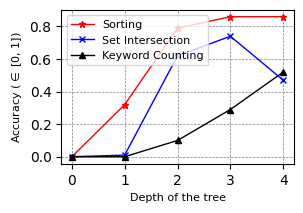

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(
    #figsize=(4, 3)
    figsize=(3, 2)
)
K = [0, 1, 2, 3, 4]
plt.xticks(
    ticks = K
)

sorting = [0.0, 0.32, 0.79, 0.86, 0.86]
set_intersection = [0.0, 0.01, 0.62, 0.74, 0.47]
keyword_counting = [0.0, 0.0, 0.1, 0.29, 0.52]

plt.plot(
    K[:len(sorting)],
    sorting,
    linestyle="solid",
    linewidth=1.0,
    marker="*",
    markersize=5,
    label="Sorting",
    color = "red"
)
plt.plot(
    K[:len(set_intersection)],
    set_intersection,
    linestyle="solid",
    linewidth=1.0,
    marker="x",
    markersize=5,
    label="Set Intersection",
    color="blue"
)
plt.plot(
    K[:len(keyword_counting)],
    keyword_counting,
    linestyle="solid",
    linewidth=1.0,
    marker="^",
    markersize=5,
    label="Keyword Counting",
    color="black"
)
plt.xlabel("Depth of the tree", fontsize=8)
plt.ylabel(f"Accuracy ($\in$ [0, 1])", fontsize=8)
plt.grid(color="grey", linestyle="--", linewidth=0.5)
#plt.title("Per depth accuracy of ToP on $\it{Tracking~Shuffled~Objects}$.", fontsize=10)
plt.legend(fontsize=8, loc="upper left")
# plt.savefig("top_got.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Miscellaneous

In [ ]:
%cd tree-of-problems/

In [39]:
from top.generator import OpenAIGenerator
from top.got.divide import divide_got_
import os

In [2]:
generator = OpenAIGenerator(
    model_name_or_path = "gpt-4o-mini-2024-07-18",
    tokenizer_name_or_path = "gpt-4o-mini-2024-07-18",
    api_key = os.environ["OPENAI_API_KEY"],
    max_retry = 3
)

In [4]:
divide_got_(
    prompts = [
        "[32, 25, 2, 13, 11, 23, 54, 49, 9, 57, 59, 6, 61, 47, 37, 34, 18, 29, 46, 45, 56, 31, 14, 17, 48, 55, 7, 50, 27, 51, 63, 44] + [49, 34, 46, 32, 17, 50, 51, 54, 61, 14, 52, 21, 56, 16, 44, 33, 25, 57, 2, 28, 35, 19, 55, 11, 22, 9, 48, 20, 53, 29, 45, 18]"
    ],
    n_splits = 2,
    description = "set_intersection",
    generate_fn = lambda x : generator.generate(prompts = x, max_new_tokens=500)
)

1 -> {
    "List 1": [32, 25, 2, 13, 11, 23, 54, 49, 9, 57, 59, 6, 61, 47, 37, 34],
    "List 2": [18, 29, 46, 45, 56, 31, 14, 17, 48, 55, 7, 50, 27, 51, 63, 44]
}
stop


[['[32, 25, 2, 13, 11, 23, 54, 49, 9, 57, 59, 6, 61, 47, 37, 34] + [49, 34, 46, 32, 17, 50, 51, 54, 61, 14, 52, 21, 56, 16, 44, 33, 25, 57, 2, 28, 35, 19, 55, 11, 22, 9, 48, 20, 53, 29, 45, 18]',
  '[18, 29, 46, 45, 56, 31, 14, 17, 48, 55, 7, 50, 27, 51, 63, 44] + [49, 34, 46, 32, 17, 50, 51, 54, 61, 14, 52, 21, 56, 16, 44, 33, 25, 57, 2, 28, 35, 19, 55, 11, 22, 9, 48, 20, 53, 29, 45, 18]']]

In [5]:
divide_got_(
    prompts = [
        "[0, 0, 5, 9, 0, 7, 9, 9, 1, 2, 6, 1, 1, 9, 0, 1, 3, 5, 2, 3, 5, 6, 0, 2, 7, 4, 6, 2, 9, 7, 5, 9]",
    ],
    n_splits = 2,
    description = "sorting",
    generate_fn = lambda x : generator.generate(prompts = x, max_new_tokens=500)
)

1 -> {
    "List 1": [0, 0, 5, 9, 0, 7, 9, 9, 1, 2, 6, 1, 1, 9, 0, 1],
    "List 2": [3, 5, 2, 3, 5, 6, 0, 2, 7, 4, 6, 2, 9, 7, 5, 9]
}
stop


[['[0, 0, 5, 9, 0, 7, 9, 9, 1, 2, 6, 1, 1, 9, 0, 1]',
  '[3, 5, 2, 3, 5, 6, 0, 2, 7, 4, 6, 2, 9, 7, 5, 9]']]

In [5]:
divide_got_(
    prompts = [
        "One evening, Sarah, an archaeologist from Norway made a surprising discovery about ancient trade routes between Sweden and Norway. As per her research, the artifacts that were found in Norway were identical to those in Sweden, indicating a deep-rooted cultural connection between Sweden and Norway. This piqued the interest of her colleague, James, who was from Canada. He had been researching the indigenous tribes of Canada and found many similarities with tribes from his neighboring country, the United States. James had always been interested in the historical ties between Canada and United States, and his study further confirmed the age-old connections between the two countries. Upon hearing James's story, Sarah shared a fascinating anecdote from her travels in Portugal. She recalled how locals loved to tell the tale of the shared history between Spain and Portugal. Her anecdotes about Spain and Portugal echoed the same sense of shared culture and past, just like in the case of Norway and Sweden, and Canada and United States. Their conversation reminded James of his stay in South Korea, where he had learned about the close relationship between North Korea and South Korea, despite their current political divide. He recalled stories about the shared history of North Korea and South Korea, whose deep-seated cultural ties transcended political boundaries. Sarah, who had been to Australia, reciprocated with her own experiences of the bond between Australia and New Zealand. She described how, despite geographical separation, Australia and New Zealand shared a unique camaraderie and close historical ties. As they exchanged stories, their conversation moved to South Africa and its various connections with its neighbouring country, Zimbabwe. Sarah shared stories she had heard about the intricate bond between South Africa and Zimbabwe, showcasing the age-old interactions between these two nations. It left them both reflecting on the timeless bonds that connect nations across the world, from Norway to Australia, Canada to Zimbabwe, and all the countries in between.",
    ],
    n_splits = 2,
    description = "keyword_counting",
    generate_fn = lambda x : generator.generate(prompts = x, max_new_tokens=500)
)

1 -> {
    "Sentence 1": "One evening, Sarah, an archaeologist from Norway made a surprising discovery about ancient trade routes between Sweden and Norway.",
    "Sentence 2": "As per her research, the artifacts that were found in Norway were identical to those in Sweden, indicating a deep-rooted cultural connection between Sweden and Norway.",
    "Sentence 3": "This piqued the interest of her colleague, James, who was from Canada.",
    "Sentence 4": "He had been researching the indigenous tribes of Canada and found many similarities with tribes from his neighboring country, the United States.",
    "Sentence 5": "James had always been interested in the historical ties between Canada and United States, and his study further confirmed the age-old connections between the two countries.",
    "Sentence 6": "Upon hearing James's story, Sarah shared a fascinating anecdote from her travels in Portugal.",
    "Sentence 7": "She recalled how locals loved to tell the tale of the shared histo

[["One evening, Sarah, an archaeologist from Norway made a surprising discovery about ancient trade routes between Sweden and Norway. As per her research, the artifacts that were found in Norway were identical to those in Sweden, indicating a deep-rooted cultural connection between Sweden and Norway. This piqued the interest of her colleague, James, who was from Canada. He had been researching the indigenous tribes of Canada and found many similarities with tribes from his neighboring country, the United States. James had always been interested in the historical ties between Canada and United States, and his study further confirmed the age-old connections between the two countries. Upon hearing James's story, Sarah shared a fascinating anecdote from her travels in Portugal. She recalled how locals loved to tell the tale of the shared history between Spain and Portugal. Her anecdotes about Spain and Portugal echoed the same sense of shared culture and past, just like in the case of Norw